# Introduction

Graphs serve as a fundamental data structure in various domains, offering a powerful representation for complex relationships among entities. In this Data Mining Lab 3, we delve into the realm of graphs, exploring their significance in understanding and analyzing real-world datasets. By leveraging graph structures, this assignment aims to decipher crucial insights hidden within the data. Specifically, we will try to represent data using graph structures, conduct in-depth analyses of these graphs, and implement cutting-edge algorithms to extract meaningful information. Throughout this endeavor, we will focus on three key aspects: spectral embeddings, node embeddings, and supervised machine learning techniques. Spectral embeddings facilitate the discovery of low-dimensional representations through eigenvalues and dimensionality reduction techniques, while node embeddings enable the transformation of graph nodes into meaningful vectors in a shared vector space, encoding their similarities and properties. Furthermore, we will harness these representations to predict properties of nodes within the graph, showcasing the practical applications of graph-based data mining.

# Medium Articles Dataset

We provide a dataset of medium articles which have to be tagged to corresponding topics (software-development, artificial intellignece, Ui/UX). Along with articles we have subscriptions lists. The articles may be related by common subscription lists. The goal is to exploit this naturally occuring network structure for classifying articles to topics. Hence, it is a 3-way node classification task

# Enviroment Setup

Groupped Imports

In [1]:
from pathlib import Path
from typing import List,Dict

import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

from gensim.models import Word2Vec

import itertools
import random

In [2]:
# Reads data from a file 'file_name' in a 'dir_name' directory
def read_data(dir_name: str, file_name: str):
    return pd.read_csv(dir_name+"/"+file_name+".csv")

Load final, train and test data

In [3]:
full_data = read_data("data/pipeline_assignment_data", "full_data_without_labels")
train_data = read_data("data/pipeline_assignment_data","train")
test_data = read_data("data/pipeline_assignment_data","test")

# For Kaggle
train_data_kaggle = read_data("data", "kaggle_train")
test_data_kaggle = read_data("data", "kaggle_test")

# Data Familizartion 

In [4]:
full_data

,article,title,subtitle,author,date,list
0,https://medium.com/@maniakacademy/code-demo-sh...,Code/Demo Share: Palo Alto Firewall Network In...,IP is broken as a unit of Control! IDENTITY as...,Sebastian Maniak,2022-08-17,https://medium.com/@zemmali1990/list/aws-49f68...
1,https://medium.com/towards-artificial-intellig...,Clustering using Social Graph Network,A Social Graph Network can be formed when ther...,Naveed Ahmed Janvekar,2022-01-29,https://medium.com/@TomaszCieplak/list/graph-d...
2,https://medium.com/@sarafparam/transformers-fo...,Transformers for Time-Series,Forecasting still remains to be dominated by S...,Param Saraf,2020-10-20,https://medium.com/@sergiobonato/list/time-ser...
3,https://medium.com/towards-data-science/review...,Reviewing A/B Testing Course by Google on Udacity,Read to find out how A/B tests are performed a...,Suyash Maheshwari,2020-05-10,https://medium.com/@online.rajib/list/ml-c2cac...
4,https://medium.com/towards-data-science/a-comp...,A Comprehensive Hands-on Guide to Transfer Lea...,Deep Learning on Steroids with the Power of Kn...,Dipanjan (DJ) Sarkar,2018-11-14,https://medium.com/@farhanhanavi07/list/deep-l...
...,...,...,...,...,...,...
27713,https://medium.com/cometheartbeat/deep-learnin...,Deep Learning Techniques you Should Know in 2022,"Over the years, Deep Learning has really taken...",Nisha Arya Ahmed,2022-04-21,https://medium.com/@vigguvenki/list/deep-learn...
27714,https://medium.com/towardsdev/intro-to-object-...,Intro to Object-Oriented Programming For Data ...,Implement a simple Linear Regression with OOP ...,Bex T.,2021-04-12,https://medium.com/@or.matalon2/list/oop-4aad5...
27715,https://medium.com/towards-data-science/learn-...,Learn Enough Docker to be Useful,Part 1: The Conceptual Landscape — Containers ...,Jeff Hale,2019-01-09,https://medium.com/@vaibhavb2473/list/machine-...
27716,https://medium.com/berndruecker/moving-from-em...,Moving from embedded to remote workflow engines,"For a long time, we have advocated for an arch...",Bernd Rücker,2022-02-08,https://medium.com/@giamma80/list/java-3c31810...


In [5]:
train_data

,index,article,title,subtitle,author,date,list,labels
0,3279,https://medium.com/dev-genius/how-to-convert-m...,How to Convert MP4 Videos to Animated GIFs,With Kazam and ffmpeg on GNU/Linux systems — I...,Jordi Bassaganas,2022-06-02,https://medium.com/@zzpzaf.se/list/var-4f4a92d...,software-development
1,26139,https://medium.com/towards-data-science/a-cust...,"Custom SpaCy Model Deployment with AWS ECR, Sa...",A tutorial on how to deploy SpaCy with AWS. — ...,Cheng,2021-06-04,https://medium.com/@munivinayk/list/nlp-242e66...,artificial-intelligence
2,9946,https://medium.com/towards-data-science/5-book...,5 Books To Grow As A Leader In Data Analytics,Are you a senior analyst growing towards a man...,Valentin Mucke,2022-01-15,https://medium.com/@Nikhil_Phadtare/list/books...,artificial-intelligence
3,2353,https://medium.com/@unsuitable001/package-cron...,"package:cronet, an HTTP Dart/Flutter package w...",My Dart Google Summer of Code 2021 experience....,Soumyadip Monda,2021-08-21,https://medium.com/@djibi.jb/list/flutter-e53c...,software-development
4,8266,https://medium.com/towards-data-science/statis...,Statistics in Python — Collinearity and Multic...,Understand how to discover multicollinearity i...,Wei-Meng Lee,2021-10-01,https://medium.com/@abhiagar/list/stats-765e27...,software-development
...,...,...,...,...,...,...,...,...
22377,6669,https://medium.com/towards-data-science/linkin...,Linking Documents in a Semantic Graph (Part 2),How to design your own graph using TigerGraph ...,Akash Kau,2020-05-27,https://medium.com/@william.sheffel/list/tiger...,artificial-intelligence
22378,18163,https://medium.com/towards-data-science/automa...,Automate Video Editing with Python,Automate the editing of explainer videos to cr...,Samir Saci,2022-11-10,https://medium.com/@jstart.james/list/photogra...,software-development
22379,13001,https://medium.com/towards-data-science/make-p...,Make Python Run As Fast As C,Faster Python Code With Numba — The Speed Issu...,Lukas Frei,2021-08-04,https://medium.com/@jstart.james/list/system-e...,artificial-intelligence
22380,25234,https://medium.com/towards-data-science/6-juli...,6 Julia Frameworks to Create Desktop GUI’s and...,Julia is used for a lot of deeply technical ap...,Logan Kilpatrick,2022-01-05,https://medium.com/@gurumurthi/list/julia-3583...,software-development


In [6]:
test_data

,index,article,title,subtitle,author,date,list,labels
0,2291,https://medium.com/towards-data-science/how-to...,How to Use the IBM Watson Tone Analyzer to Per...,How to use the IBM Watson Artificial Intellige...,Graham Harrison,2022-01-02,https://medium.com/@4ndres.gaviria/list/nlp-to...,artificial-intelligence
1,7292,https://medium.com/towards-data-science/surviv...,Survival Analysis: Intuition & Implementation ...,There is a statistical technique which can ans...,Anurag Pandey,2019-01-06,https://medium.com/@jz5246/list/analytics-559c...,artificial-intelligence
2,6768,https://medium.com/experience-stack/embrace-co...,Embrace Complexity (Part 1),Why all organisations should build internal ne...,Tony Seale,2022-02-04,https://medium.com/@yasha.brener/list/data-man...,software-development
3,15003,https://medium.com/towards-data-science/every-...,"Every Complex DataFrame Manipulation, Explaine...","Melts, pivots, joins, explodes, & more — Panda...",Andre Ye,2020-07-22,https://medium.com/@4ndres.gaviria/list/dataop...,artificial-intelligence
4,19782,https://medium.com/towards-data-science/macroe...,Macroeconomic & Financial Factors and Ordinary...,Econometrics model using Arbitrage Pricing The...,Sarit Maitra,2020-06-27,https://medium.com/@halo9pan/list/quantitative...,software-development
...,...,...,...,...,...,...,...,...
3945,14424,https://medium.com/towards-data-science/normal...,Normalization vs Standardization — Quantitativ...,Stop using StandardScaler from Sklearn as a de...,Shay Geller,2019-04-04,https://medium.com/@farhanhanavi07/list/applie...,artificial-intelligence
3946,18949,https://medium.com/@petruknisme/getting-starte...,Getting Started with Covenant C2 for Red Teaming,Command and Control is part of Red Teaming tac...,Aan,2021-11-21,https://medium.com/@jimmy.winghang/list/mitre-...,software-development
3947,9305,https://medium.com/towards-data-science/how-to...,How to Create a Vector-Based Movie Recommendat...,Building a movie recommendation system using t...,Michelangiolo Mazzeschi,2021-12-10,https://medium.com/@subhasis.jethy/list/recomm...,artificial-intelligence
3948,24337,https://medium.com/towards-data-science/how-to...,How to Use Pandas for Big Data,Run distributed workload with Pandas on Spark ...,Edwin Tan,2022-01-25,https://medium.com/@jethro_torczon/list/big-da...,artificial-intelligence


In [7]:
train_data["labels"].value_counts()

labels
software-development       11586
artificial-intelligence    10646
ux                           150
Name: count, dtype: int64

In [8]:
test_data["labels"].value_counts()

labels
software-development       2022
artificial-intelligence    1899
ux                           29
Name: count, dtype: int64

In [9]:
train_data.list.value_counts()

list
https://medium.com/@zzpzaf.se/list/databases-sql-90d6238ba0c6                                                                                                                                                                                                                                                                                                                              273
https://medium.com/@zzpzaf.se/list/javascript-b3ff697e30e0                                                                                                                                                                                                                                                                                                                                 243
https://medium.com/@zzpzaf.se/list/git-devops-b3812a465482                                                                                                                                                                           

# Word2Vec

Using Word2Vec to get word embeddings

In [10]:
"""
Generate encoding for labels using label encoder
"""

# Label encoder for labels in train data
multilabel_binarizer = LabelEncoder()
multilabel_binarizer.fit(train_data["labels"])

# Label encoder for labels in full data
Y_w2v = multilabel_binarizer.transform(train_data["labels"])
texts = [x[0]+" " + x[1] for x in zip(train_data.title,train_data.subtitle)]

In [11]:
"""
Train word2vec model on title + subtitles to establish a baseline 
without network structure
"""

# Combine title and subtitle into one text
all_texts = [x[0]+" " + x[1] for x in zip(full_data.title,full_data.subtitle)]

# Train word2vec model on all texts
word2vec_model = Word2Vec([text.split(" ") for text in all_texts], vector_size=128, window=10, epochs=30, sg=1, workers=4,min_count=1)

In [12]:
embeddings = []

"""
Infer word2vec embeddings for article titles and subtitles using trained word2vec model
"""

for text in texts:
    embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(embeddings).shape)
X_train_w2v = np.vstack(embeddings)


(22382, 128)


Trying to train a classifier just based on the word2vec embeddings

In [13]:
"""
Train a SVM classifier on generated article embeddings
"""

svc = SVC()
svc.fit(X_train_w2v, Y_w2v)

SVC()

In [14]:
test_embeddings = []
text_texts = [x[0]+" " + x[1] for x in zip(test_data.title,test_data.subtitle)]

"""
Compute embeddings for test samples
"""

for text in text_texts:
    test_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(test_embeddings).shape)
X_test_w2v = np.vstack(test_embeddings)


(3950, 128)


In [15]:
"""
Generate predictions using the SVM classifier for test articles
"""

predictions_w2v = svc.predict(X_test_w2v)

In [16]:
"""
Encode predictions
"""

Y_test = multilabel_binarizer.transform(test_data["labels"])

Y_test

array([0, 0, 1, ..., 0, 0, 0])

# Pipeline Overview

Our goal is to contruct a graph from  given data by connecting nodes that atleast share one common subscription list.

This step is followed by a random walk to construct node embeddings.

Then the node embeddings are employed for the task of topic classification.

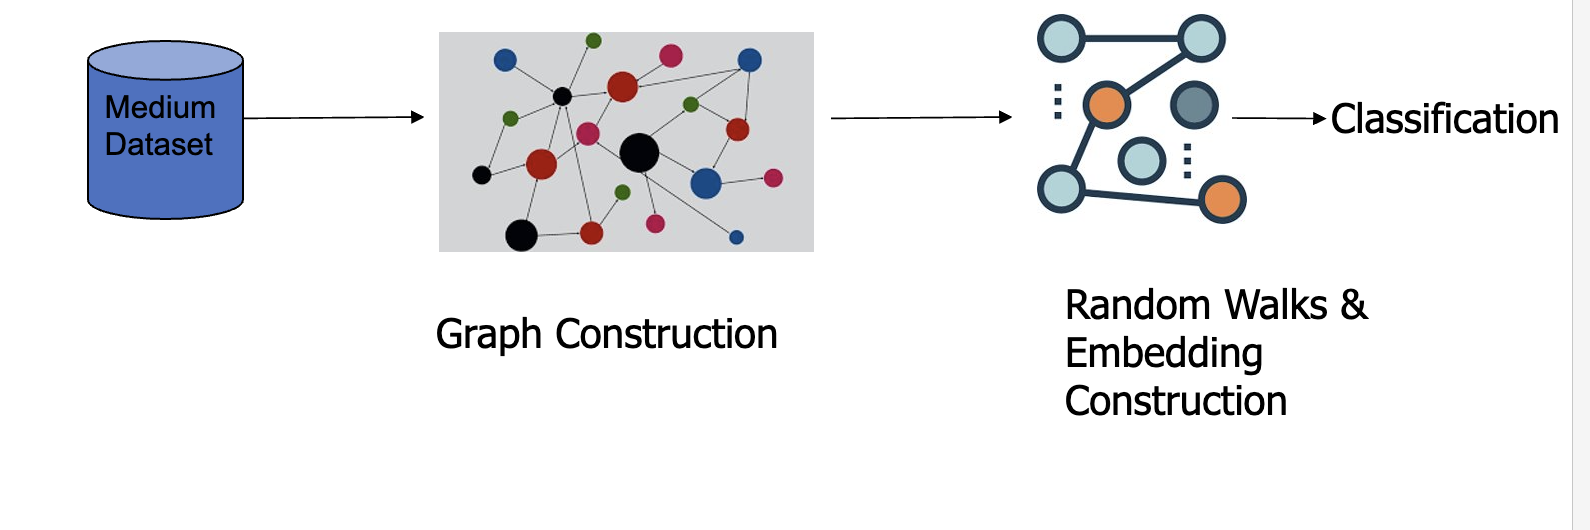

## Form graph

Our goal is to contruct a graph from  given data by connecting nodes that atleast share one common subscription list. The networkx part has already been written for you. 

Your task here is to write the module to construct the edges and find isolated nodes and also analyze the resulting graph by reporting number of edges, number of nodes, number of isolated nodes. 



In [17]:
def map_subscription_list_to_articles(data):
    subscription_list_map = {}
    
    # Create a mapping from subscription lists to articles
    for i, row in data.iterrows():
        
        # Get the subscription lists for the article
        subscription_lists = row['list'].split('; ')
        
        # For each subscription list, add the article to the list of articles
        for subscription_list in subscription_lists:

            # If the subscription list is not in the map, add it
            if subscription_list not in subscription_list_map:
                subscription_list_map[subscription_list] = set()
            
            subscription_list_map[subscription_list].add(i)

    return subscription_list_map

In [18]:
def get_edges(data: pd.DataFrame, nodes) -> List:
    """ Given the dataframe with articles and lists return the set of edges
        Args:
        data (pd.DataFrame): The medium dataset
        nodes: dict (nodeid: article title)
    Returns:
            edges (List[tuple]): List of edges"""
    edges = []    
    
    ## START
    
    subscription_list_map = map_subscription_list_to_articles(data)

    # Iterate over the articles of each subscription list
    for subscribed_articles in subscription_list_map.values():

        # Find all combination of articles in the subscription list and add them as edges
        edges += [(article_1, article_2) for (article_1, article_2) in itertools.combinations(subscribed_articles, 2)]

    print("Edges: ", len(edges))
    ##END
    
    return edges




In [19]:
def get_nodes(data: pd.DataFrame) -> Dict:
    """ Given the dataframe with articles and lists return the set of nodes
        Args:
        data (pd.DataFrame): The medium dataset
    Returns:
        nodes: dict (nodeid: article title)"""
    nodes = {}
    for index, row in data.iterrows():
        if index not in nodes:
            nodes[index] = row["title"]
    print("Nodes: ", len(nodes))
    return nodes

In [20]:
def form_graph(data: pd.DataFrame) -> nx.Graph:
    """Forms graph from medium article dataset.

    Args:
        data (pd.DataFrame): The medium dataset

    Returns:
        G (nx.Graph): The graph.

       """
    texts = [x[0]+" " + x[1] for x in zip(data.title,data.subtitle)]
    nodes = get_nodes(data)
    edges = get_edges(data, nodes)
    graph = nx.Graph()
    graph.add_nodes_from(list(nodes.keys()))
    graph.add_edges_from(edges)
    return graph


In [21]:
graph = form_graph(full_data)

Nodes:  27718
Edges:  2257190


In [22]:
# Find isolated nodes with no neighbors before random walks
### START
isolated = list(nx.isolates(graph))
print("Isolated nodes: ", len(isolated))
### END

Isolated nodes:  347


### Graph analysis

Upon the formation of the graph, the analysis above reveals the presence of 27,718 nodes and 2,257,190 edges within the network. This shows a considerable volume of interconnected relationships among the articles. However, it is impoerant to understand that not all articles may belong to common reading lists, leading to the existence of isolated nodes within the graph structure. These isolated nodes, numbering 347 in total as shown above, represent articles that lack direct connections to other nodes in the network. This observation suggests a potential limitation in the connectivity of certain articles within the dataset. Furthermore, recognizing these isolated nodes is essential in the following stages, particularly in handling embedding construction, where the inclusion of all nodes, regardless of connectivity, ensures a comprehensive representation of the dataset's structural characteristics. This is why, the identification and analysis of isolated nodes provide valuable insights into the network's topology, helping in the development of strategies to address connectivity gaps and optimize subsequent analytical processes. Although it is definetly good that the amount of isolated nodes is realtively low, compared to the overall amount of nodes in the graph, indicating low fraction.

## Node2Vec


Here the task is to perform random walks on the graph formed in the previous step and compute embeddings for the nodes using the random walk results.

You can use gensim to compute embeddings, however for random walks you are expected to implement without relying on networkx. Your weblab assignment would aid you in the same. For gensim you are expected to use Word2Vec. However you  can explore on best ways to configure the hyperparams for your word2vec instance for better donwstream classification task.

In [23]:
def random_walks(G: nx.Graph, num_walks: int, walk_length: int, isolated: List) -> np.ndarray:
    """Perform random walks on the graph.

    Args:
        G (nx.Graph): The graph.
        num_walks (int): The number of random walks for each node.
        walk_length (int): The number of nodes in a random walk.
        isolated (List[int]): list of isolated nodeids

    Returns:
        np.ndarray: The random walks, shape (n_nodes * num_walks, walk_length)
    """
    result = []
    ### START

    # Iterate over all nodes in the graph
    for n in G.nodes:
        # Skip isolated nodes
        if n in isolated:
            continue
        
        # Perform random walks for each node
        for _ in range(num_walks):

            # Start a random walk from the current node
            walk = [n]
            current = n
            
            # Perform a random walk of length walk_length
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(current))
                if not neighbors:
                    break 
                following = np.random.choice(neighbors)
                walk.append(following)
                current = following

            result.append(walk)

    ## END
    return np.asarray(result)

In [24]:
def fit_node2vec(walks: np.ndarray, vector_size: int, window: int, epochs: int) -> Word2Vec:
    """Train a Node2Vec model on random walks. Uses the GenSim Word2Vec implementation.

    Args:
        walks (np.ndarray): The random walks.
        vector_size (int): Node representation size.
        window (int): Window width.
        epochs (int): Number of epochs.

    Returns:
        Word2Vec: The trained model.
    """
    ### START

    # Train the Word2Vec model
    model = Word2Vec(
        [[str(node) for node in walk] for walk in walks],
        vector_size=vector_size, window=window, epochs=epochs, sg=1, workers=4, min_count=1
    )

    return model

    ### END

In [25]:
# OLD: 10 -> 8
walks = random_walks(graph, 8, 16, isolated)

In [26]:
# OLD: window=5, epochs=10
node2vec_model = fit_node2vec(walks, vector_size=128, window=5, epochs=12)

In [27]:
def get_nodeids(data: pd.DataFrame):
    """Get nodeids from graph

    Args:
        data (pd.DataFrame): medium articles dataset

    Returns:
        nodes (dict): nodeids with mapped article titles
    """
    nodes = {}
    for _, row in data.iterrows():
        if row["index"] not in nodes:
            nodes[row["index"]] = row["title"]
    return nodes

In [28]:
"""Get train and test nodes from the graph
    """
train_nodes = get_nodeids(train_data)
test_nodes = get_nodeids(test_data)
train_nodes = list(train_nodes.keys())
test_nodes = list(test_nodes.keys())

In [29]:
len(test_nodes)

3950

In [30]:
"""Get node2vec embeddings (nodeid to embeddings mapping)
    """
embeddings = {word: node2vec_model.wv[word] for word in node2vec_model.wv.index_to_key}


## Word2vec + Node2vec

Compute word2vec embeddings for a given title

In [31]:
def compute_word_embeddings(title, word2vec_model):
    
    # Compute word embeddings for each word in the title
    word_embeddings = [word2vec_model.wv[word] for word in title.split() if word in word2vec_model.wv]

    # If no words have embeddings, return a vector of zeros
    return np.mean(word_embeddings, axis=0) if word_embeddings else np.zeros(word2vec_model.vector_size)


Compute embeddings for a given set of node ids

In [32]:
def compute_embeddings(data, node_ids, word2vec_model, node2vec_embeddings):
    """Compute embeddings for a given set of node ids"""
    embeddings = list()
    
    # Iterate over the node ids
    for node_id in node_ids:
        
        if "title" in data.columns:
            # Get the title of the article by indexing the df
            title = data.loc[data['index'] == node_id, 'title'].values[0]
            # Compute the word embeddings for the title
            title_embedding = compute_word_embeddings(title, word2vec_model)
        else:
            title_embedding = np.zeros(word2vec_model.vector_size)

        # Compute the node2vec embeddings for the node
        node_embedding = node2vec_embeddings[str(node_id)] if str(node_id) in node2vec_embeddings else np.zeros(128)
        
        # Concatenate the two embeddings
        final_embedding = np.concatenate((title_embedding, node_embedding))
        
        embeddings.append(final_embedding)
    
    return np.array(embeddings)

In [33]:
"""Compute train and test embeddings.
Concatenate the word2vec embeddings of article titles
with the node2vec embeddings suing dictionary from previous step.
Dimension 1 of your embeddings should be 256.
 Consider isolated nodes and handle them when computing embeddings"""
X_train_combined = compute_embeddings(train_data, train_nodes, word2vec_model, embeddings)
X_test_combined = compute_embeddings(test_data, test_nodes, word2vec_model, embeddings)

In [34]:
X_test_combined.shape, X_train_combined.shape

((3950, 256), (22382, 256))

In [35]:
svc = SVC()
svc.fit(X_train_combined,Y_w2v)

SVC()

In [36]:
Y_w2v.shape , X_train_combined.shape, X_test_combined.shape

((22382,), (22382, 256), (3950, 256))

In [37]:
predictions_combined = svc.predict(X_test_combined)

In [38]:
predictions_combined

array([0, 0, 1, ..., 0, 0, 0])

## Only node2vec features

In [39]:
X_train_n2v = np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)  ], dtype=np.float32)
X_test_n2v = np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)  ], dtype=np.float32)

In [40]:
svc = SVC()
svc.fit(X_train_n2v,Y_w2v)

SVC()

In [41]:
predictions_node2vec = svc.predict(X_test_n2v)

# Analysis

Comparing Word2Vec-only, Node2Vec-only, and Word2Vec+Node2Vec settings provides insights into their performance and the impact of network structure. Word2Vec-only captures semantic similarities but may overlook structural relationships. Node2Vec-only excels where network context is crucial but lacks semantic richness. Word2Vec+Node2Vec integrates both, leveraging textual and network information for improved classification. The fusion proves beneficial, as it combines the strengths of both approaches, resulting in enhanced predictive accuracy by capturing both semantic and structural features. Overall, it must be underlined and further understood how the combinatory approach yields a better accuracy score. The performance analyses will be conduncted in this section:

## Performance of word2vec

In [42]:
print(metrics.classification_report(Y_test, predictions_w2v))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1899
           1       0.84      0.82      0.83      2022
           2       0.00      0.00      0.00        29

    accuracy                           0.83      3950
   macro avg       0.55      0.56      0.55      3950
weighted avg       0.82      0.83      0.83      3950



/Users/v/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/v/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/v/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
"""
Compute Macro f1
"""

print(metrics.f1_score(Y_test, predictions_w2v, average="macro"))

0.5542805262498564


In [44]:
# Train a TSNE model on the word2vec embeddings
tsne_word2vec = TSNE().fit_transform(X_test_w2v)

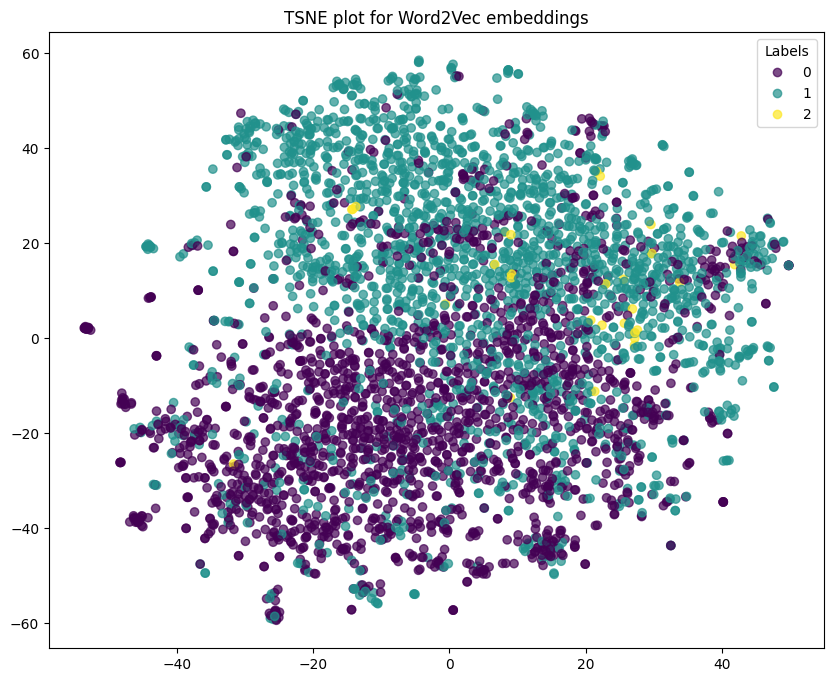

In [45]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_word2vec[:, 0], tsne_word2vec[:, 1], c=Y_test, alpha=0.7)
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")

plt.title('TSNE plot for Word2Vec embeddings')
plt.show()

## Peformance of node2vec

In [46]:
print(metrics.classification_report(Y_test, predictions_node2vec))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1899
           1       0.84      0.76      0.80      2022
           2       0.86      0.41      0.56        29

    accuracy                           0.80      3950
   macro avg       0.82      0.68      0.72      3950
weighted avg       0.81      0.80      0.80      3950



In [47]:
print(metrics.f1_score(Y_test, predictions_node2vec,average="macro"))


0.723250354955472


In [48]:
# Train a TSNE model on the node2vec embeddings
tsne_node2vec = TSNE().fit_transform(X_test_n2v)

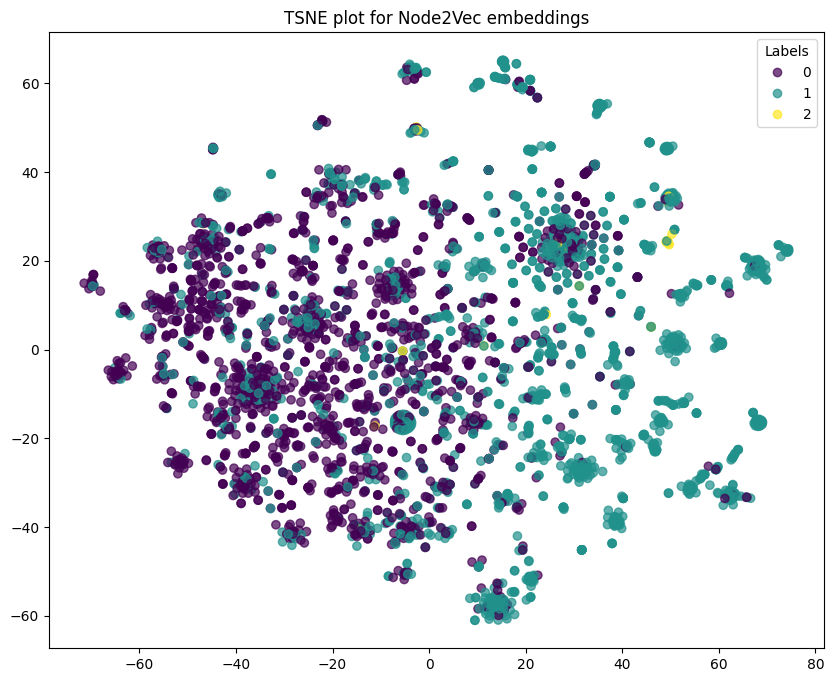

In [49]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_node2vec[:, 0], tsne_node2vec[:, 1], c=Y_test, alpha=0.7)
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")

plt.title('TSNE plot for Node2Vec embeddings')
plt.show()

## Performance of word2vec + node2vec

In [50]:
print(metrics.classification_report(Y_test, predictions_combined))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1899
           1       0.87      0.79      0.83      2022
           2       0.86      0.41      0.56        29

    accuracy                           0.83      3950
   macro avg       0.84      0.70      0.74      3950
weighted avg       0.84      0.83      0.83      3950



In [51]:
print(metrics.f1_score(Y_test, predictions_combined, average="macro"))

0.7421056658724726


In [52]:
# Train a TSNE model on the combined embeddings
tsne_combined = TSNE(n_components=2, random_state=1).fit_transform(X_test_combined)

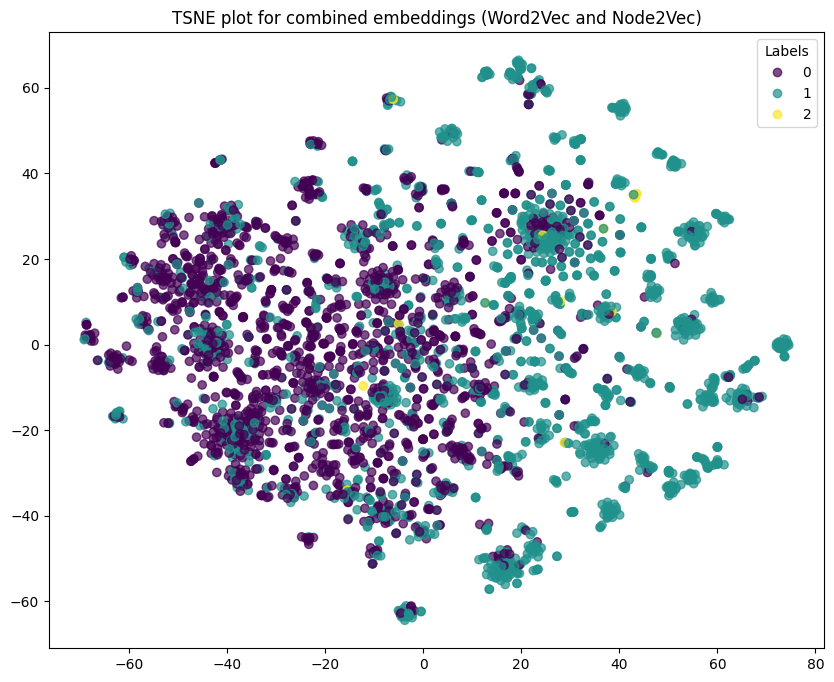

In [53]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_combined[:, 0], tsne_combined[:, 1], c=Y_test, alpha=0.7)
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")

plt.title('TSNE plot for combined embeddings (Word2Vec and Node2Vec)')
plt.show()

## Conclusion

### Word2Vec
Word2Vec model shows decent perforamce in capturing semantic relationships within the given data, which is shown by high precision and recoil values. High precision for label 0 and 1 (0.81 and 0.84) indicates that the model is good in predicting if an article belongs to those labels and recoil for the same labels (0.85, 0.82) shows that the model captures a good proportion of articles belonging to those labels.
However low F1-Score of 0 for label 2 and high score of other shows an imbalance, indicating the inability of the model to capturing structural infromation of that label. 

The lack of structure can further be seen in the graph, due to labels of all classes being in a single hugle blub, which shows that it's poor performance in capturing relationships.

## Node2Vec
Node2Vec model as designed to capture structural information and relationship of nodes in the graph, does proper job. This is indicated by a good F1 Score over all labels, which means that model makes balanced predictions across all labels, hence showing that it effectively uses structural infromation to capture the relationships. 

This can also be seen from the graph, as we can definetly now can see data being more structured for each label, rather than being in one hugh bulb, as in the first graph.

# Node2Vec + Word2Vec

Node2Vec and Word2Vec doesn't make much of a difference, although you can clearly see some slight improvements from the table given. From the graph we can also see the good structure, but it really simillar to the Node2Vec graph. This might be due to Word2Vec not being able to capture the semantic relationships to the extent, that Node2Vec has to. Also Class 2 has a low support of 29, hence making it challenging to capture semantic relationships and node relationships associated with label 2.

To conclude, I would still choose Node2Vec + Word2Vec, due to significant increase in performance of labels 0 and 1 and due to the importance of still attempting to capture semantic relationships, as in case the dataset will be increased with the amount of support for label 2, the impact of Word2Vec should increase.

# Kaggle Submission

In [134]:
def create_submission(predictions, filename='output.csv'):

    submission = pd.DataFrame({
        'Index': range(len(predictions)), 
         'Label': multilabel_binarizer.inverse_transform(predictions)
    })
    submission.to_csv(filename, index=False)

In [135]:
def predict(node2vec_model, word2vec_model, train_data, test_data):

    # Generate embediing using Node2Vec model for train and test data
    train_node_ids, test_node_ids = get_nodeids(train_data), get_nodeids(test_data)
    train_embeddings, test_embeddings = compute_embeddings(train_data, train_node_ids, word2vec_model, node2vec_model.wv), compute_embeddings(test_data, test_node_ids, word2vec_model, node2vec_model.wv)
    
    # Train the classifier 
    svc = SVC()
    svc.fit(train_embeddings, multilabel_binarizer.transform(train_data["labels"]))

    return svc.predict(test_embeddings)

In [136]:
predictions = predict(node2vec_model, word2vec_model, train_data_kaggle, test_data_kaggle)

create_submission(predictions)